### <font color='red'> Seattle House Price. </font>

![](https://mail.passive.ie/media/k2/items/cache/4a731cb975d8a85e08e102d6760e988b_XL.jpg?t=20170913_124056)

#### This is a real dataset of house prices sold in Seattle, Washing, USA between August and December 2022. The task is to predict the house price in this area based on several features.

#### Our data has 2016 values and 8 columns, Here we will use the "train.csv" database that has been made available for use, below you will see an analysis of the data, the processing of that data and the use of machine learning classification models to achieve our goal.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install plotly
!pip install yellowbrick
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the train database using the name "df" in the variable and the test database using the name "df_test".

In [3]:
df = pd.read_csv("train.csv" , sep = ',')
df_test = pd.read_csv("test.csv" , sep = ',')

#### Here we can see that all variables are continuous, we can also see that we have this column Zip Code that will probably not be used, we can also see that we have some null values.

#### Here the explanation about the variables:

#### beds: Number of bedrooms in property
#### baths: Number of bathrooms in property. Note 0.5 corresponds to a half-bath which has a sink and toilet but no tub or shower
#### size: Total floor area of property
#### size_units: Units of the previous measurement
#### lot_size: Total area of the land where the property is located on. The lot belongs to the house owner
#### lot_size_units: Units of the previous measurement
#### zip_code: Zip code. This is a postal code used in the USA
#### price: Price the property was sold for (US dollars)

In [4]:
df.head(5)

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [5]:
df.dtypes

beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [7]:
df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [8]:
(df.isnull().sum()/len(df))

beds              0.000000
baths             0.000000
size              0.000000
size_units        0.000000
lot_size          0.172123
lot_size_units    0.172123
zip_code          0.000000
price             0.000000
dtype: float64

#### let's exclude null values ​​from our base.

In [9]:
df = df.dropna()

In [10]:
(df.isnull().sum()/len(df))

beds              0.0
baths             0.0
size              0.0
size_units        0.0
lot_size          0.0
lot_size_units    0.0
zip_code          0.0
price             0.0
dtype: float64

#### As we have only one value, let's delete the size_units variable

In [11]:
df = df.drop('size_units', axis = 1)

## <font color='blue'> 2. Data Analysis. </font>

#### Verifying the correlation between our variables.

#### Here we can see that we have some strong correlations between some variables, let's leave those for the moment.

#### Continous Variable

#### Looking at our continuous variables we can see some patterns, the more bedrooms/bathrooms the smaller the number of values ​​in the database, the same thing when we look at the price variable, interesting that in the variable lot_size_units we have practically only two values.

<Axes: xlabel='price', ylabel='Count'>

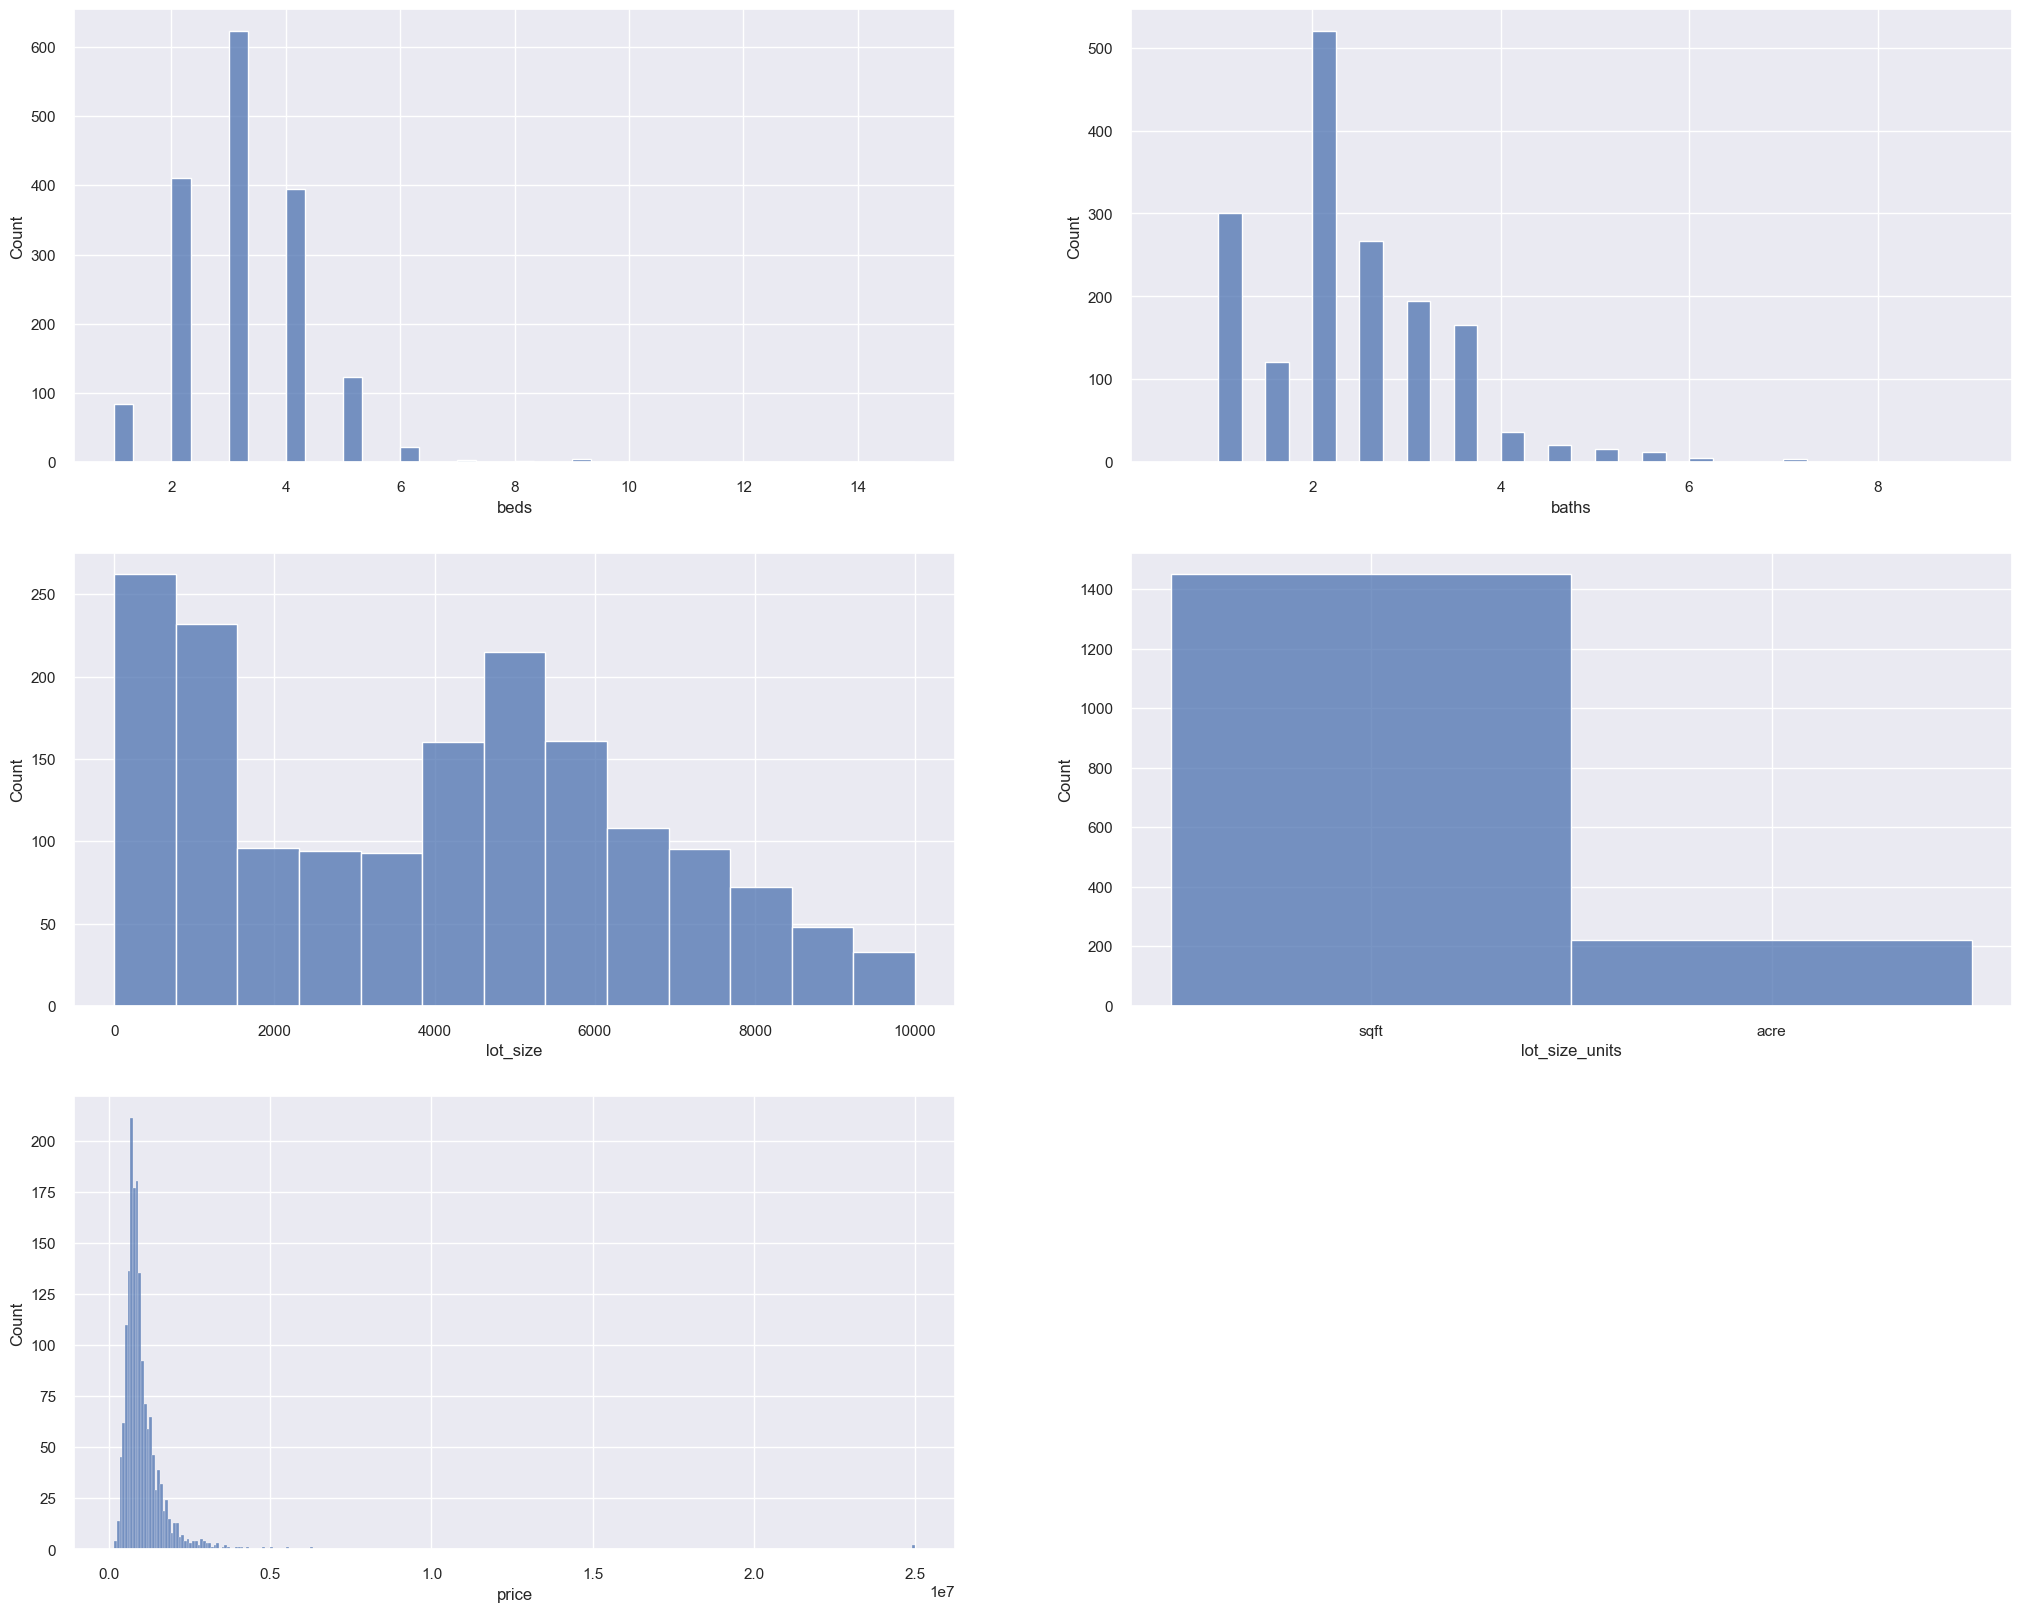

In [12]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.histplot(df['beds'], kde = False)

plt.subplot(3,2,2)
sns.histplot(df['baths'], kde = False)

plt.subplot(3,2,3)
sns.histplot(df['lot_size'], kde = False)

plt.subplot(3,2,4)
sns.histplot(df['lot_size_units'], kde = False)

plt.subplot(3,2,5)
sns.histplot(df['price'], kde = False)

#### Looking at the boxplot of our Bed variable, we can see that we have 2 specific houses with bathrooms above 10. Let's remove these 2 values ​​to avoid outliers.

<Axes: title={'center': 'Boxplot Beds'}, xlabel='beds'>

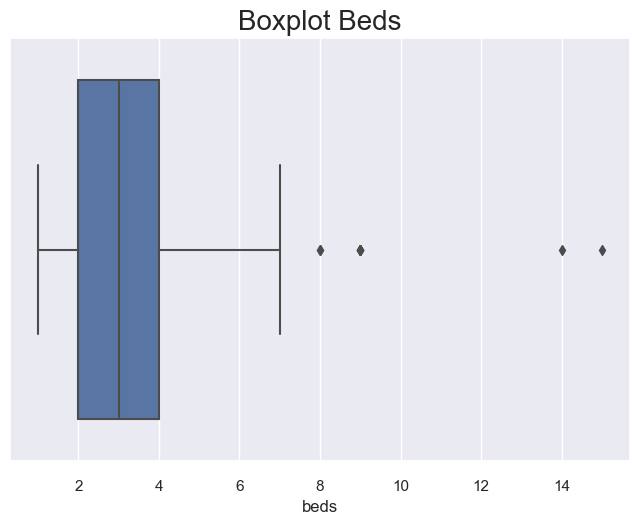

In [13]:
plt.title("Boxplot Beds", fontdict = {'fontsize': 20})
sns.boxplot(x=df["beds"])

In [14]:
df = df[df['beds'] < 10]

<Axes: title={'center': 'Boxplot Beds Without Outliers'}, xlabel='beds'>

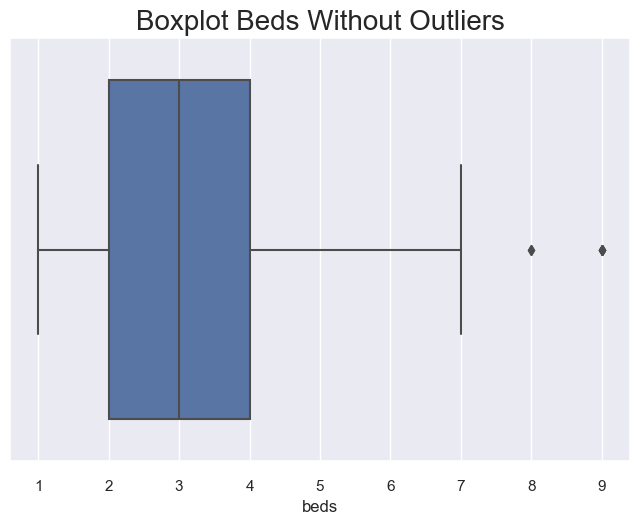

In [15]:
plt.title("Boxplot Beds Without Outliers", fontdict = {'fontsize': 20})
sns.boxplot(x=df["beds"])

#### Looking at the bathroom variable, we can see that we have 2 values ​​to the right, but the difference is not that big when compared to most values.

<Axes: title={'center': 'Boxplot Baths'}, xlabel='baths'>

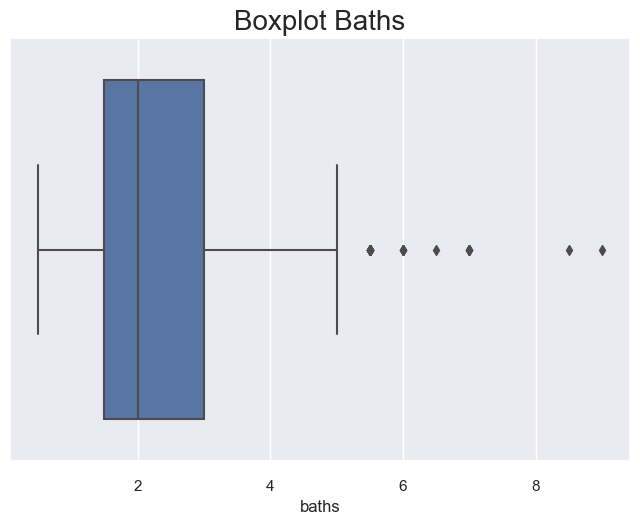

In [16]:
plt.title("Boxplot Baths", fontdict = {'fontsize': 20})
sns.boxplot(x=df["baths"])

#### Looking at the price variable, we can see that we have a value that distorts a lot from the others, we will remove this value so as not to bias the model.

<Axes: title={'center': 'Boxplot Price'}, xlabel='price'>

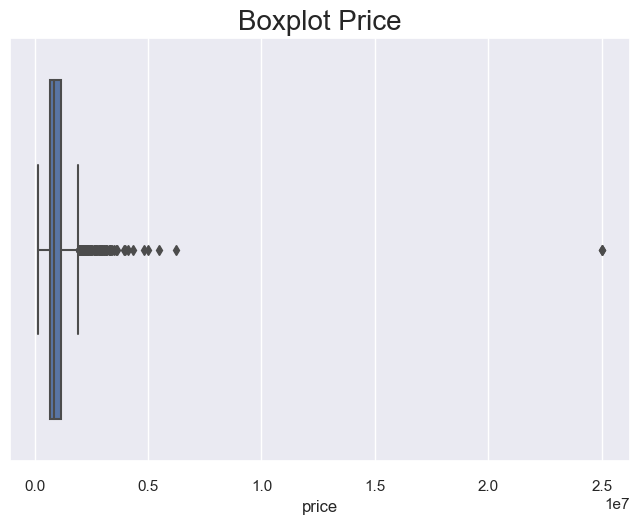

In [17]:
plt.title("Boxplot Price", fontdict = {'fontsize': 20})
sns.boxplot(x=df["price"])

In [18]:
df = df[df['price'] < 5000000]

<Axes: title={'center': 'Boxplot Price After Outlier'}, xlabel='price'>

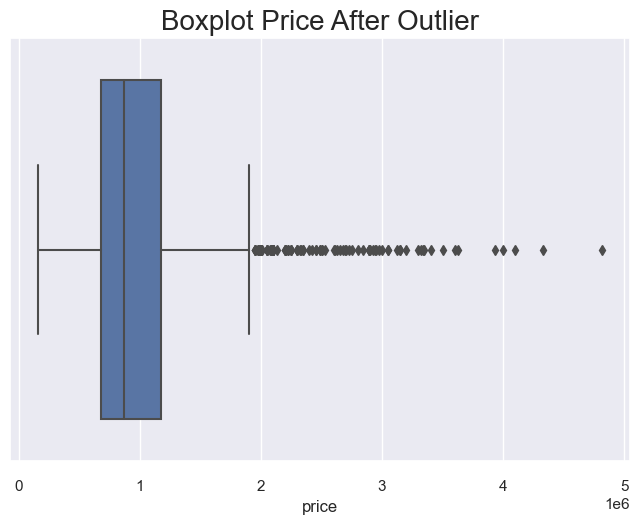

In [19]:
plt.title("Boxplot Price After Outlier", fontdict = {'fontsize': 20})
sns.boxplot(x=df["price"])

#### Bivariate Analysis

#### Here, when we compare our variable Price with the variable rooms, it is interesting to see that although the greater the number of rooms, the higher the price of the house, not all values ​​fit this pattern.

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_15856\883212164.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "beds", y = "price", palette = "Set2", data = df).set(title='Bed x Price')


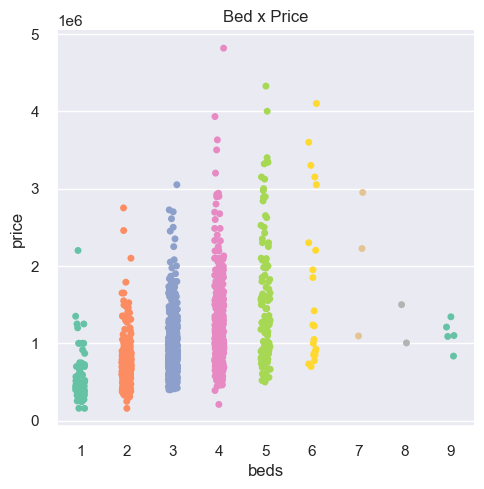

In [20]:
sns.catplot(x = "beds", y = "price", palette = "Set2", data = df).set(title='Bed x Price')

#### Same standard as the variable rooms.

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_15856\3155542215.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "baths", y = "price", palette = "Set2", data = df, height=3.2, aspect=3).set(title='Baths x Price')


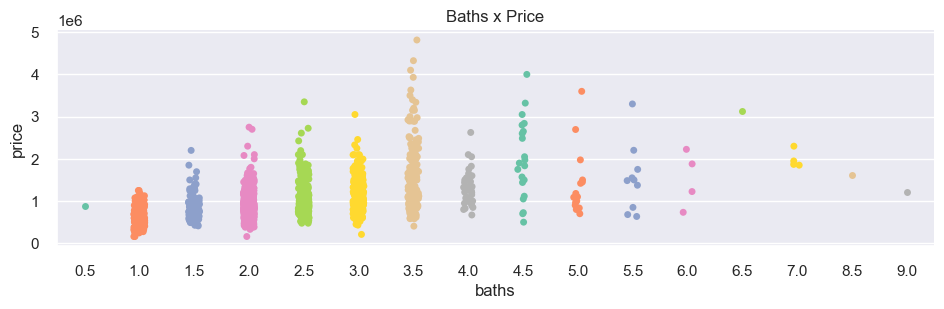

In [21]:
sns.catplot(x = "baths", y = "price", palette = "Set2", data = df, height=3.2, aspect=3).set(title='Baths x Price')

#### Looking at the zip_code variable, we don't see a pattern in a given location.

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_15856\2204971608.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "zip_code", y = "price", palette = "Set2", data = df, height=3.2, aspect=3).set(title='Zip_Code x Price')


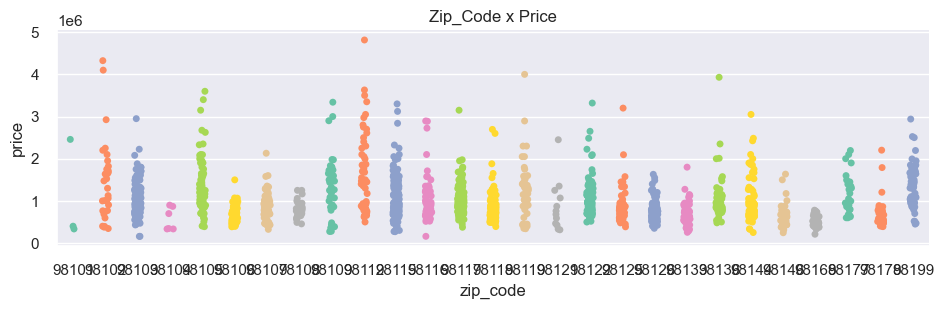

In [22]:
sns.catplot(x = "zip_code", y = "price", palette = "Set2", data = df, height=3.2, aspect=3).set(title='Zip_Code x Price')

#### Now looking at the Size x Price variable, we can see a pattern that makes a lot of sense, generally the bigger the house, the higher the price.

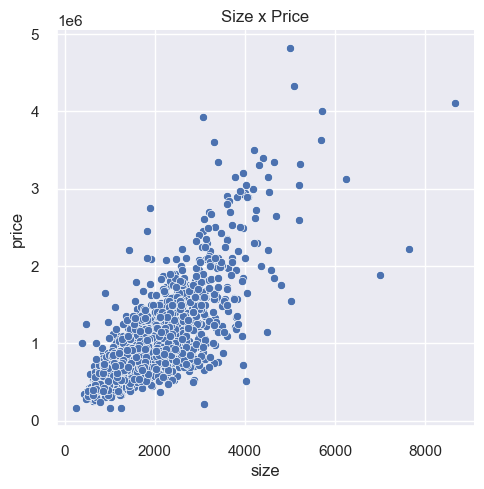

In [23]:
sns.relplot(x='size', y = 'price' , data = df).set(title='Size x Price')

#### Looking at the variable lot_size by price, we also couldn't find a defined pattern.

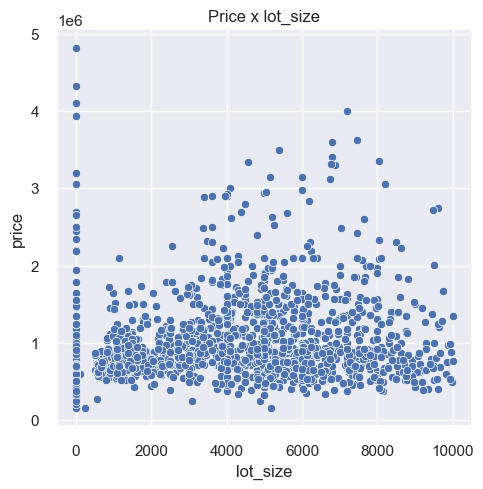

In [24]:
sns.relplot(x='lot_size', y = 'price' , data = df).set(title='Price x lot_size')

#### Now let's take a look specifically at the variable that had a pattern when compared to the Price variable, in this case the Size variable.

#### This comparison between Beds x Size makes a lot of sense, the larger the number of Beds, the larger the house.

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_15856\1341030970.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "beds", y = "size", palette = "Set2", data = df).set(title='Bed x Size')


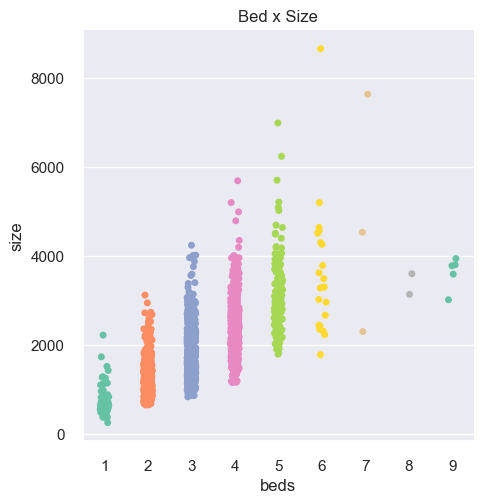

In [25]:
sns.catplot(x = "beds", y = "size", palette = "Set2", data = df).set(title='Bed x Size')

#### Same sense as when comparing Beds x Size, but we can see that not all cases fit.

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_15856\764454225.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "beds", y = "baths", palette = "Set2", data = df).set(title='Bed x baths')


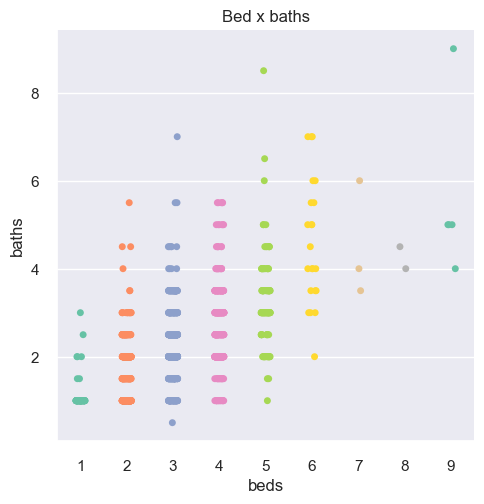

In [26]:
sns.catplot(x = "beds", y = "baths", palette = "Set2", data = df).set(title='Bed x baths')

#### Looking at the Size x Lot_size variable, we did not find a pattern.

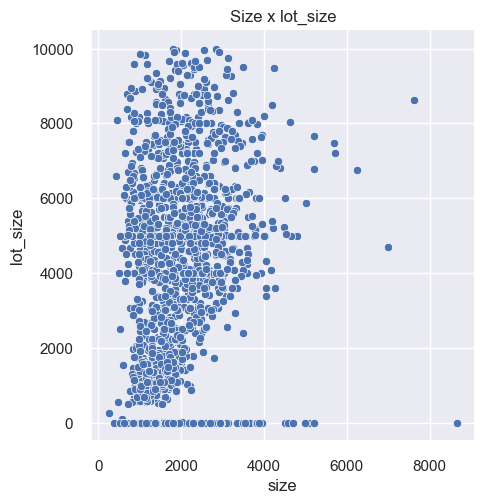

In [27]:
sns.relplot(x='size', y = 'lot_size' , data = df).set(title='Size x lot_size')

## <font color='blue'> 3. Model Building. </font>

#### Separating into features variables and target variable.

In [28]:
X = df.drop('price', axis = 1)

In [29]:
X = X.values

In [30]:
y = df['price']

#### Label Encoder

#### Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder_lot_size_units = LabelEncoder()
label_encoder_zip_code = LabelEncoder()

In [33]:
X[:,4] = label_encoder_lot_size_units.fit_transform(X[:,4])
X[:,5] = label_encoder_zip_code.fit_transform(X[:,5])

#### Applying StandardScaler in our data to put the data in the same size setting.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
y_standard = scaler.fit_transform(y.values.reshape(-1,1))

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_standard, test_size = 0.3, random_state = 0)

In [37]:
X_train.shape, y_train.shape

((1163, 6), (1163, 1))

In [38]:
X_test.shape, y_test.shape

((499, 6), (499, 1))

#### Linear Regression

#### Here we will use the Linear Regression Model.

In [39]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [40]:
lr_model.fit(X_train, y_train)

LinearRegression()

#### Looking at our scores in the training base and in the test base, in the training base we have 60,03% of accuracy, it isn't a good number, when we look at the test base we have 64,31%

In [41]:
lr_normal_score_train = lr_model.score(X_train, y_train)

In [42]:
lr_normal_score_train

0.6003350048655648

In [43]:
lr_normal_score_test = lr_model.score(X_test, y_test)

In [44]:
lr_normal_score_test

0.6431858188414719

#### Checking for model errors

In [45]:
previsoes = lr_model.predict(X_test)

#### Looking at our Mean Absolut Error metric, we have the number of 214704, which tells us that it can err 214704 up or down, and when we look at our Root Mean Square Error we get the number of 324865.

In [46]:
mae_lr_normal = mean_absolute_error(y_test, previsoes)

In [47]:
mae_lr_normal

0.4020685550560498

In [48]:
rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))

In [49]:
rmse_lr_normal

0.6083618124561568

#### Polynomial Regression

#### Here we will use the Polynomial Regression Model.

In [50]:
from sklearn.preprocessing import PolynomialFeatures

#### Running the Model

In [51]:
poly = PolynomialFeatures(degree = 2)

In [52]:
X_poly_train = poly.fit_transform(X_train)

In [53]:
X_poly_test = poly.transform(X_test)

In [54]:
X_poly_train.shape, X_poly_test.shape

((1163, 28), (499, 28))

In [55]:
lr_poly = LinearRegression()

In [56]:
lr_poly.fit(X_poly_train, y_train)

LinearRegression()

#### Using the Polynomial model we had an improvement in the training result but the training result was practically the same.

In [57]:
lr_poly_normal_score_train = lr_poly.score(X_poly_train, y_train)

In [58]:
lr_poly_normal_score_train

0.6264282297322146

In [59]:
lr_poly_normal_score_test = lr_poly.score(X_poly_test, y_test)

In [60]:
lr_poly_normal_score_test

0.6455608149080935

#### Checking for Models errors.

In [61]:
previsoes = lr_poly.predict(X_poly_test)

#### Looking at our Mean Absolut Error metric, we have the number of 217277, which tells us that it can err 217277 up or down, and when we look at our Root Mean Square Error we get the number of 323803.

In [62]:
mae_poly_normal = mean_absolute_error(y_test, previsoes)

In [63]:
mae_poly_normal

0.40685885903400676

In [64]:
rmse_poly_normal = np.sqrt(mean_squared_error(y_test, previsoes))

In [65]:
rmse_poly_normal

0.6063337691406073

#### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor

#### Applying GridSearch

#### Here we are applying GridSearch to check which are the best metrics to use.

In [67]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

In [68]:
model = DecisionTreeRegressor()

In [69]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)

In [70]:
gridDecisionTree.fit(X_train, y_train)

C:\Users\TUSHAR GAURAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\TUSHAR GAURAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TUSHAR GAURAV\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\TUSHAR GAURAV\AppData\Local\Programs\Python\Python311\Lib\site-

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

#### Decision Tree - Grid

In [71]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  5
Algorithm:  absolute_error
Score:  0.5274177150820345


#### Applying Decision Tree

In [72]:
decision_tree = DecisionTreeRegressor(min_samples_split = 2, max_depth =5, criterion = 'absolute_error')

In [73]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

#### Looking at our scores in the training base and in the test base, in the training base we have 67,73% of accuracy, it isn't a good number, when we look at the test base we have 62,52%

In [74]:
lr_normal_decision_tree = decision_tree.score(X_train, y_train)

In [75]:
lr_normal_decision_tree

0.6773980013063587

In [76]:
lr_normal_decision_tree_test = decision_tree.score(X_test, y_test)

In [77]:
lr_normal_decision_tree_test

0.6252883155221488

#### Checking for Models errors.

In [78]:
previsoes = decision_tree.predict(X_test)

#### Looking at our Mean Absolut Error metric, we have the number of 211715, which tells us that it can err 211715 up or down, and when we look at our Root Mean Square Error we get the number of 332912.

In [79]:
mae_lr_normal_decision_tree  = mean_absolute_error(y_test, previsoes)

In [80]:
mae_lr_normal_decision_tree

0.3964719053101687

In [81]:
rmse_lr_normal_decision_tree = np.sqrt(mean_squared_error(y_test, previsoes))

In [82]:
rmse_lr_normal_decision_tree

0.6234326019869076

#### Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

In [84]:
regressor_rf.fit(X_train, y_train)

C:\Users\TUSHAR GAURAV\AppData\Local\Temp\ipykernel_15856\154324081.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_rf.fit(X_train, y_train)


RandomForestRegressor()

#### Looking at our scores in the training base and in the test base, in the training base we have 95,35% of accuracy, it is a very good number, but when we look at the test base we have 72,72% it isn't a very good number but its better than the other models.

In [85]:
lr_normal_rf = regressor_rf.score(X_train, y_train)

In [86]:
lr_normal_rf

0.9543924356443032

In [87]:
lr_normal_rf_test = regressor_rf.score(X_test, y_test)

In [88]:
lr_normal_rf_test

0.7300939956046493

#### Checking for Models errors.

In [89]:
previsoes = regressor_rf.predict(X_test)

#### Looking at our Mean Absolut Error metric, we have the number of 181654, which tells us that it can err 181654 up or down, and when we look at our Root Mean Square Error we get the number of 284054.

In [90]:
mae_lr_normal_rf  = mean_absolute_error(y_test, previsoes)

In [91]:
mae_lr_normal_rf

0.3426757055580697

In [92]:
rmse_lr_normal_rf = np.sqrt(mean_squared_error(y_test, previsoes))

In [93]:
rmse_lr_normal_rf

0.5291114561654534

#### Checking the most important variables of the model

In [94]:
columns = df.drop('price', axis = 1).columns

In [95]:
feature_imp_random = pd.Series(regressor_rf.feature_importances_, index = columns).sort_values(ascending = False)

In [96]:
feature_imp_random

size              0.684408
zip_code          0.115657
lot_size          0.100868
baths             0.060298
beds              0.033253
lot_size_units    0.005516
dtype: float64

#### SVR (Support Vector Regression)

In [97]:
from sklearn.svm import SVR

#### Linear

In [98]:
regressor_svr_linear = SVR(kernel = 'linear')

In [99]:
regressor_svr_linear.fit(X_train, y_train.ravel())

SVR(kernel='linear')

#### Looking at our scores in the training base and in the test base, in the training base we have 59,14% of accuracy, it isn't a good number, when we look at the test base we have 62,50%

In [100]:
standard_svm_linear = regressor_svr_linear.score(X_train, y_train)

In [101]:
standard_svm_linear

0.5914971255275656

In [102]:
standard_svm_linear_test = regressor_svr_linear.score(X_test, y_test)

In [103]:
standard_svm_linear_test

0.6250823490726319

#### Checking for Models errors.

In [104]:
previsoes = regressor_svr_linear.predict(X_test)

#### Looking at our Mean Absolut Error metric, we have the number of 211762, which tells us that it can err 211762 up or down, and when we look at our Root Mean Square Error we get the number of 333004.

In [105]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

#### Looking at our Mean Absolut Error metric, we have the number of 211762, which tells us that it can err 211762 up or down, and when we look at our Root Mean Square Error we get the number of 333004.

In [106]:
mae_svr_linear_standard  = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [107]:
mae_svr_linear_standard

211762.3016253647

In [108]:
rmse_svm_linear_standard = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [109]:
rmse_svm_linear_standard

333004.3640976099

#### Polynomial Kernel

In [110]:
regressor_svr_poly = SVR(kernel = 'poly', degree = 3)

In [111]:
regressor_svr_poly.fit(X_train, y_train.ravel())

SVR(kernel='poly')

#### Looking at our scores in the training base and in the test base, in the training base we have 34,65% of accuracy, it isn't a good number, when we look at the test base we have 41,64%, probably the worst model that we have.

In [112]:
standard_svm_poly = regressor_svr_poly.score(X_train, y_train)

In [113]:
standard_svm_poly

0.3465979105427921

In [114]:
standard_svm_poly_test = regressor_svr_poly.score(X_test, y_test)

In [115]:
standard_svm_poly_test

0.4164355022280313

#### Checking for Models errors.

In [116]:
previsoes = regressor_svr_poly.predict(X_test)

In [117]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

#### Looking at our Mean Absolut Error metric, we have the number of 251400, which tells us that it can err 251400 up or down, and when we look at our Root Mean Square Error we get the number of 415457.

In [118]:
mae_svr_poly_standard  = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [119]:
mae_svr_poly_standard

251400.13860302448

In [120]:
rmse_svm_poly_standard = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [121]:
rmse_svm_poly_standard

415457.3177344011

#### Kernel RBF

In [122]:
regressor_svr_rbf = SVR(kernel = 'rbf')

In [123]:
regressor_svr_rbf.fit(X_train, y_train.ravel())

SVR()

#### Looking at our scores in the training base and in the test base, in the training base we have 67,74% of accuracy, it isn't a good number, when we look at the test base we have 67,40%.

In [124]:
standard_svm_rbf = regressor_svr_rbf.score(X_train, y_train)

In [125]:
standard_svm_rbf

0.6774670814156933

In [126]:
standard_svm_rbf_test = regressor_svr_rbf.score(X_test, y_test)

In [127]:
standard_svm_rbf_test

0.6740847427406618

#### Checking for Models errors.

In [128]:
previsoes = regressor_svr_rbf.predict(X_test)

In [129]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

#### Looking at our Mean Absolut Error metric, we have the number of 193205, which tells us that it can err 193205 up or down, and when we look at our Root Mean Square Error we get the number of 310480.

In [130]:
mae_svr_rbf_standard = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [131]:
mae_svr_rbf_standard

193205.83076694535

In [132]:
rmse_svm_rbf_standard = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [133]:
rmse_svm_rbf_standard

310480.4987327046

#### RNA

In [134]:
from sklearn.neural_network import MLPRegressor

In [135]:
regressor_rna = MLPRegressor(max_iter = 1000, hidden_layer_sizes=(4, 4))

In [136]:
regressor_rna.fit(X_train, y_train.ravel())

MLPRegressor(hidden_layer_sizes=(4, 4), max_iter=1000)

#### Looking at our scores in the training base and in the test base, in the training base we have 64,90% of accuracy, it isn't a good number, when we look at the test base we have 67,18%.

In [137]:
standard_rna = regressor_rna.score(X_train, y_train)

In [138]:
standard_rna

0.6217119801827515

In [139]:
standard_rna_test = regressor_rna.score(X_test, y_test)

In [140]:
standard_rna_test

0.6576272938005471

#### Checking for Models errors.

In [141]:
previsoes = regressor_rna.predict(X_test)

In [142]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

#### Looking at our Mean Absolut Error metric, we have the number of 204722, which tells us that it can err 204722 up or down, and when we look at our Root Mean Square Error we get the number of 311564.

In [143]:
mae_rna_standard = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [144]:
mae_rna_standard

214448.25071108178

In [145]:
rmse_rna_standard = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [146]:
rmse_rna_standard

318222.98797025444

#### ADABoost

In [147]:
from sklearn.ensemble import AdaBoostRegressor

#### Applying GridSearch

#### Here we are applying GridSearch to check which are the best metrics to use.

In [148]:
n_estimators = np.array([500])
learning_rate = np.array([1.0, 1.1, 0.01, 0.2, 0.3, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [149]:
model = AdaBoostRegressor()

In [150]:
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = 1)

In [151]:
gridAdaBoost.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': array([1.  , 1.1 , 0.01, 0.2 , 0.3 , 0.4 ]),
                         'n_estimators': array([500])})

#### AdaBoost - Grid

In [152]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.01
Score:  0.5388290377417627


#### Running the Model

In [153]:
ada_boost = AdaBoostRegressor(learning_rate = 0.01, n_estimators = 500)

In [154]:
ada_boost.fit(X_train, y_train.ravel())

AdaBoostRegressor(learning_rate=0.01, n_estimators=500)

#### Looking at our scores in the training base and in the test base, in the training base we have 64,69% of accuracy, it isn't a good number, when we look at the test base we have 62,45%.

In [155]:
lr_normal_ada_boost = ada_boost.score(X_train, y_train)

In [156]:
lr_normal_ada_boost

0.6450889415462248

In [157]:
lr_normal_ada_boost_test = ada_boost.score(X_test, y_test)

In [158]:
lr_normal_ada_boost_test

0.6211056170000293

#### Checking for Models errors.

In [159]:
previsoes = ada_boost.predict(X_test)

In [160]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

#### Looking at our Mean Absolut Error metric, we have the number of 234107, which tells us that it can err 234107 up or down, and when we look at our Root Mean Square Error we get the number of 333238.

In [161]:
mae_lr_normal_ada_boost  = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [162]:
mae_lr_normal_ada_boost

235421.96390271327

In [163]:
rmse_ada_boost = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [164]:
rmse_ada_boost

334765.7855983728

#### Gradient Boosting

In [165]:
from sklearn.ensemble import GradientBoostingRegressor

#### Applying GridSearch

#### Here we are applying GridSearch to check which are the best metrics to use.

In [166]:
n_estimators = np.array([500])
learning_rate = np.array([1.0, 1.1, 1.5, 1.7, 0.5, 0.4])
criterion = np.array(['friedman_mse', 'squared_error'])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'criterion': criterion}

In [167]:
model = GradientBoostingRegressor()

In [168]:
gridGradientBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = 1)

In [169]:
gridGradientBoost.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'criterion': array(['friedman_mse', 'squared_error'], dtype='<U13'),
                         'learning_rate': array([1. , 1.1, 1.5, 1.7, 0.5, 0.4]),
                         'n_estimators': array([500])})

#### Grid - Gradient Boosting

In [170]:
print('Learning Rate: ', gridGradientBoost.best_estimator_.learning_rate)
print('Criterion: ', gridGradientBoost.best_estimator_.criterion)
print('Score: ', gridGradientBoost.best_score_)

Learning Rate:  0.4
Criterion:  friedman_mse
Score:  0.5710909880133047


#### Running the Model

In [171]:
grad_boost = GradientBoostingRegressor(learning_rate = 0.4, n_estimators = 500, criterion = 'friedman_mse')

In [172]:
grad_boost.fit(X_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.4, n_estimators=500)

#### Looking at our scores in the training base and in the test base, in the training base we have 99,48% of accuracy, it is a very good number, but when we look at the test base and try to reply we have 69,13%.

In [173]:
lr_normal_grad_boost = grad_boost.score(X_train, y_train)

In [174]:
lr_normal_grad_boost

0.9948582838269058

In [175]:
lr_normal_grad_boost_test = grad_boost.score(X_test, y_test)

In [176]:
lr_normal_grad_boost_test

0.6852893027661797

#### Checking for model errors.

In [177]:
previsoes = grad_boost.predict(X_test)

In [178]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

#### Looking at our Mean Absolut Error metric, we have the number of 191637, which tells us that it can err 191637 up or down, and when we look at our Root Mean Square Error we get the number of 302148.

In [179]:
mae_lr_normal_grad_boost  = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [180]:
mae_lr_normal_grad_boost

194668.34658485174

In [181]:
rmse_grad_boost = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [182]:
rmse_grad_boost

305096.8572040157

#### Neural Network

#### Here we are going to apply a neural network to try to predict the house price.

In [183]:
df_neural = df

In [184]:
label_encoder_lot_size_units = LabelEncoder()
label_encoder_zip_code = LabelEncoder()

In [185]:
df_neural['lot_size_units'] = label_encoder_lot_size_units.fit_transform(df_neural['lot_size_units'])
df_neural['zip_code'] = label_encoder_zip_code.fit_transform(df_neural['zip_code'])

In [186]:
df_neural['beds'] = df_neural['beds'].astype('float32')
df_neural['lot_size_units'] = df_neural['lot_size_units'].astype('float32')

In [187]:
X = df_neural.drop('price', axis = 1)

In [188]:
X = X.values

In [189]:
y = df_neural['price']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [192]:
!pip install keras
!pip install tensorflow
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers

  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB ? eta -:--:--
     --                                       0.1/1.3 MB 1.6 MB/s eta 0:00:01
     -----                                    0.2/1.3 MB 1.5 MB/s eta 0:00:01
     --------                                 0.3/1.3 MB 1.8 MB/s eta 0:00:01
     ------------                             0.4/1.3 MB 2.0 MB/s eta 0:00:01
     ----------------                         0.5/1.3 MB 2.1 MB/s eta 0:00:01
     --------------------           

#### We will use 2 input networks and 1 output network.

In [193]:
model = Sequential()
model.add(Dense(128, input_dim = 6, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, input_dim = 6, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))

from tensorflow.keras.optimizers import Adam
optimitzer = Adam()

In [194]:
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mae'])

#### Let's use 300 Epochs and 500 data in the batch_size.

In [195]:
model.fit(X_train, y_train, epochs = 300, batch_size = 500, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/300
3/3 [==============================] - 2s 163ms/step - loss: 1285010620416.0000 - mae: 1002207.0000 - val_loss: 1283430940672.0000 - val_mae: 993822.2500
Epoch 2/300
3/3 [==============================] - 0s 42ms/step - loss: 1284465491968.0000 - mae: 1001965.3125 - val_loss: 1282921988096.0000 - val_mae: 993587.0625
Epoch 3/300
3/3 [==============================] - 0s 31ms/step - loss: 1283985637376.0000 - mae: 1001742.0000 - val_loss: 1282433220608.0000 - val_mae: 993361.3125
Epoch 4/300
3/3 [==============================] - 0s 34ms/step - loss: 1283470000128.0000 - mae: 1001509.3125 - val_loss: 1281934360576.0000 - val_mae: 993131.6875
Epoch 5/300
3/3 [==============================] - 0s 32ms/step - loss: 1282925395968.0000 - mae: 1001265.5000 - val_loss: 1281374552064.0000 - val_mae: 992873.1250
Epoch 6/300
3/3 [==============================] - 0s 33ms/step - loss: 1282315649024.0000 - mae: 1000980.5000 - val_loss: 1280729022464.0000 - val_mae: 992574.5000
Epoch 7/3

#### Looking at the neural network we managed to arrive at the MAE of 234234.3594, which is worse than our best Machine Learning model.

#### Checking key variables to predict the outcome.

#### CHI-2

In [196]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

In [197]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
lot_size,1411806.33
size,525479.46
zip_code,2853.45
baths,419.19
beds,387.12
lot_size_units,120.90


#### Random Forest

In [198]:
feature_imp_random

size              0.684408
zip_code          0.115657
lot_size          0.100868
baths             0.060298
beds              0.033253
lot_size_units    0.005516
dtype: float64

#### Checking the Results

In [199]:
linear_regression = {'Model':'Linear Regression',
               'Score Train':lr_normal_score_train,
               'Score Test':lr_normal_score_test,
               'MSE':mae_lr_normal,
               'RMSE':rmse_lr_normal,}

polynomial_regression = {'Model':'Polynomial Regression',
               'Score Train':lr_poly_normal_score_train,
               'Score Test':lr_normal_score_test,
               'MSE':mae_poly_normal,
               'RMSE':rmse_poly_normal,}

decision_tree = {'Model':'Decision Tree',
               'Score Train':lr_normal_decision_tree,
               'Score Test':lr_normal_decision_tree_test,
               'MSE':mae_lr_normal_decision_tree,
               'RMSE':rmse_lr_normal_decision_tree,}

random_forest = {'Model':'Random Forest',
               'Score Train':lr_normal_rf,
               'Score Test':lr_normal_rf_test,
               'MSE':mae_lr_normal_rf,
               'RMSE':rmse_lr_normal_rf,}

svr_linear = {'Model':'SVR Linear',
               'Score Train':standard_svm_linear,
               'Score Test':standard_svm_linear_test,
               'MSE':mae_svr_linear_standard,
               'RMSE':rmse_svm_linear_standard,}

svr_polynomial = {'Model':'SVR Polynomial',
               'Score Train':standard_svm_poly,
               'Score Test':standard_svm_poly_test,
               'MSE':mae_svr_poly_standard,
               'RMSE':rmse_svm_poly_standard,}

svr_rbf = {'Model':'SVR RBF',
               'Score Train':standard_svm_rbf,
               'Score Test':standard_svm_rbf_test,
               'MSE':mae_svr_rbf_standard,
               'RMSE':rmse_svm_rbf_standard,}

rna = {'Model':'RNA',
               'Score Train':standard_rna,
               'Score Test':standard_rna_test,
               'MSE':mae_rna_standard,
               'RMSE':rmse_rna_standard,}

ada = {'Model':'Ada Boost',
               'Score Train':lr_normal_ada_boost,
               'Score Test':lr_normal_ada_boost_test,
               'MSE':mae_lr_normal_ada_boost,
               'RMSE':rmse_ada_boost,}

grad = {'Model':'Gradient Boosting',
               'Score Train':lr_normal_grad_boost,
               'Score Test':lr_normal_grad_boost_test,
               'MSE':mae_lr_normal_grad_boost,
               'RMSE':rmse_grad_boost,}

In [200]:
resume = pd.DataFrame({'Linear Regression':pd.Series(linear_regression),
                       'Polynomial Regression':pd.Series(polynomial_regression),
                       'Decision Tree':pd.Series(decision_tree),
                       'Random Forest':pd.Series(random_forest),
                       'SVR Linear':pd.Series(svr_linear),
                       'SVR Polynomial':pd.Series(svr_polynomial),
                       'SVR RBF':pd.Series(svr_rbf),
                       'RNA':pd.Series(rna),
                       'AdaBoost':pd.Series(ada),
                       'GradientBoosting':pd.Series(grad),
                      })

In [201]:
resume

,Linear Regression,Polynomial Regression,Decision Tree,Random Forest,SVR Linear,SVR Polynomial,SVR RBF,RNA,AdaBoost,GradientBoosting
Model,Linear Regression,Polynomial Regression,Decision Tree,Random Forest,SVR Linear,SVR Polynomial,SVR RBF,RNA,Ada Boost,Gradient Boosting
Score Train,0.600335,0.626428,0.677398,0.954392,0.591497,0.346598,0.677467,0.621712,0.645089,0.994858
Score Test,0.643186,0.643186,0.625288,0.730094,0.625082,0.416436,0.674085,0.657627,0.621106,0.685289
MSE,0.402069,0.406859,0.396472,0.342676,211762.301625,251400.138603,193205.830767,214448.250711,235421.963903,194668.346585
RMSE,0.608362,0.606334,0.623433,0.529111,333004.364098,415457.317734,310480.498733,318222.98797,334765.785598,305096.857204


## <font color='blue'> 4. Conclusion. </font>

#### We can see that all our data are numerical and continuous, in our database we don't have many values ​​available, which makes our work more difficult, when we look at our data we can see that we have some null values, which makes necessary to process these values.

#### Looking at our exploratory analysis of the data, we were unable to see great patterns defined among the variables, only the more "patterns" such as the more beds and baths the larger the house. values ​​that follow this pattern, when we look at our target price variable we can see that the only variable that has a defined pattern is the size variable, which makes a lot of sense.

#### Talking about the Machine Learning models, we were not able to have a very expressive result, most of the models were between 60% and 65% correct, and we had the analysis of the MAE and MRSE errors very similar between the values, but the best model that we had was the Random Forest model followed by the Gradient Boosting model.

#### When we look at the variables that most explain our models, it is interesting to see that CHI-2 places the Lot_Size variable as very important, different from our best Random Forest model which places the Size variable as the most important variable to explain the model.